# Sales - kaggle - challenge

·       shop_ID : Shop's unique identifier.

·       day_of_the_week : Encoded from 0 to 6.

·       date : day, month and year of the data point.

·       number of customers : Quantity of customers that showed up that day.

·       open : Binary variable equal to 0 if shop closed that day and 1 if shop open.

·       promotion : Binary variable equal to 0 if shop had no promotions that day and 1 if it did.

·       state_holiday : Encoded 0, a, b, c indicating if there was a state holiday at all (0 if not), and otherwise, the number indicates which state holiday it was.

·       school_holiday : Binary variable equal to 0 if there was a school holiday that day and 1 if not

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('sales.csv')

The objective is to analyse or predict the revenue of the shops in each day.
what's unnamed:0?

In [5]:
df.head(10)


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [6]:
df.shape

(640840, 10)

# Cleaning

- are there any duplicates?
- are there N/A

In [10]:
df.isna().sum().sum()

0

In [13]:
exception_columns = ['date']

for column in df.columns:
    if column not in exception_columns:
        unique_values = df[column].unique()
        print(f'values in {column}: {unique_values}')
    else:
        print(f'Skipping unique check in "{column}" ')

values in Unnamed: 0: [425390 291687 411278 ... 117952 435829 305711]
values in store_ID: [366 394 807 ... 450  38 989]
values in day_of_week: [4 6 2 7 3 5 1]
Skipping unique check for date 
values in nb_customers_on_day: [ 517  694  970 ... 4630 3713 4003]
values in open: [1 0]
values in promotion: [0 1]
values in state_holiday: ['0' 'a' 'c' 'b']
values in school_holiday: [0 1]
values in sales: [ 4422  8297  9729 ... 27154 17964 16737]


# EDA 

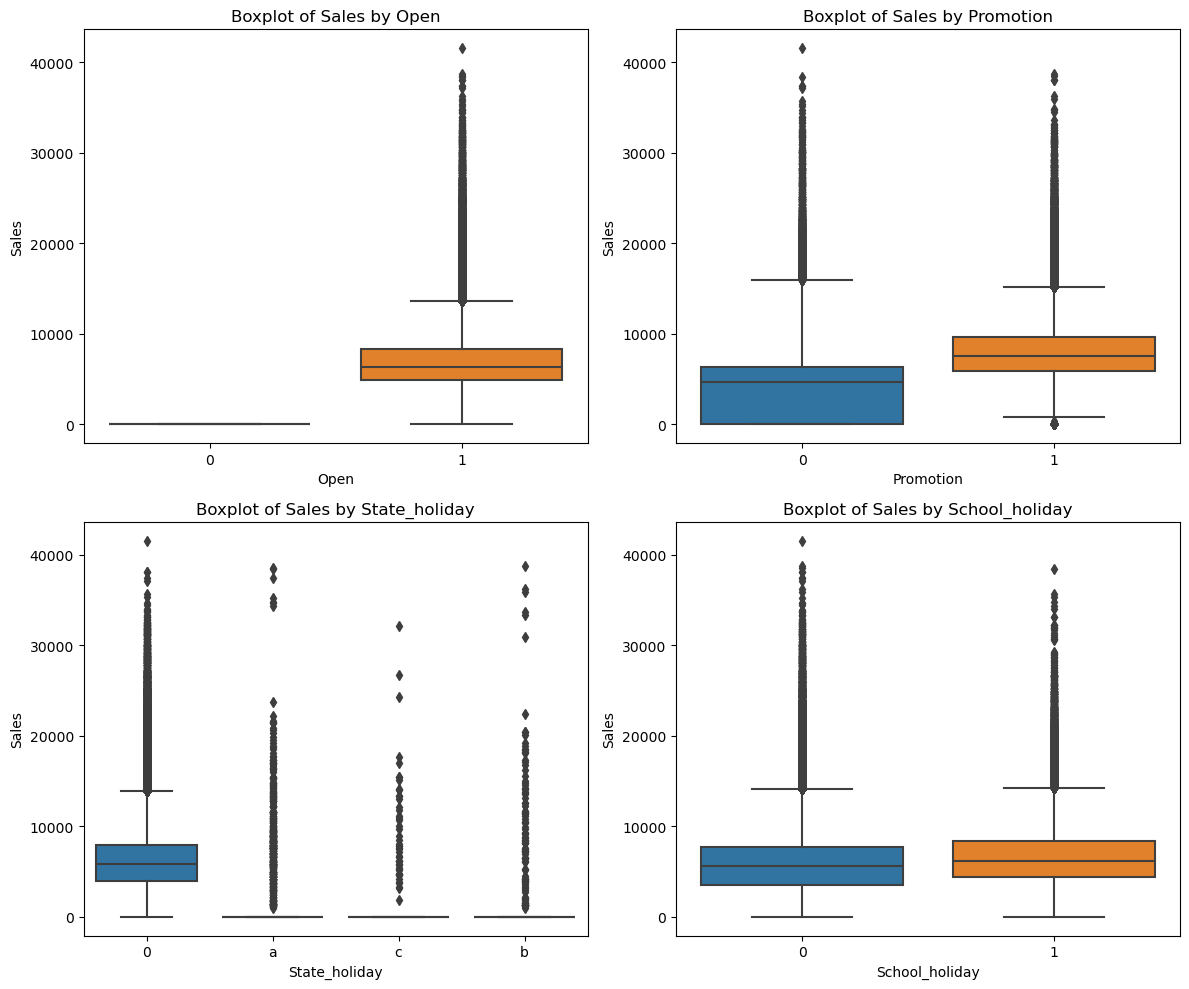

In [21]:
# BOXPLOT EDA for categoricals
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the categorical variables and create boxplots
for i, column in enumerate(['open', 'promotion', 'state_holiday', 'school_holiday']):
    sns.boxplot(x=column, y='sales', data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of Sales by {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Sales')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
#OPEN and CLOSED
sales_when_open = df['sales'][df['open'] == 1].mean()
sales_when_close = df['sales'][df['open'] == 0].mean()
print(f'sales mean open {sales_when_open}/ close {sales_when_close}')
#conclusion: evacuate the close

sales mean open 6959.251678520946/ close 0.0


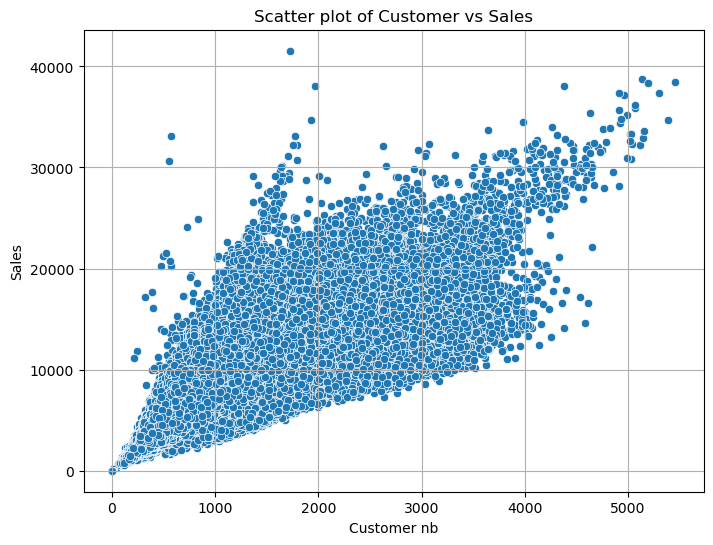

In [23]:
#NUMERICALS 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='nb_customers_on_day', y='sales')
plt.title('Scatter plot of Customer vs Sales')
plt.xlabel('Customer nb')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

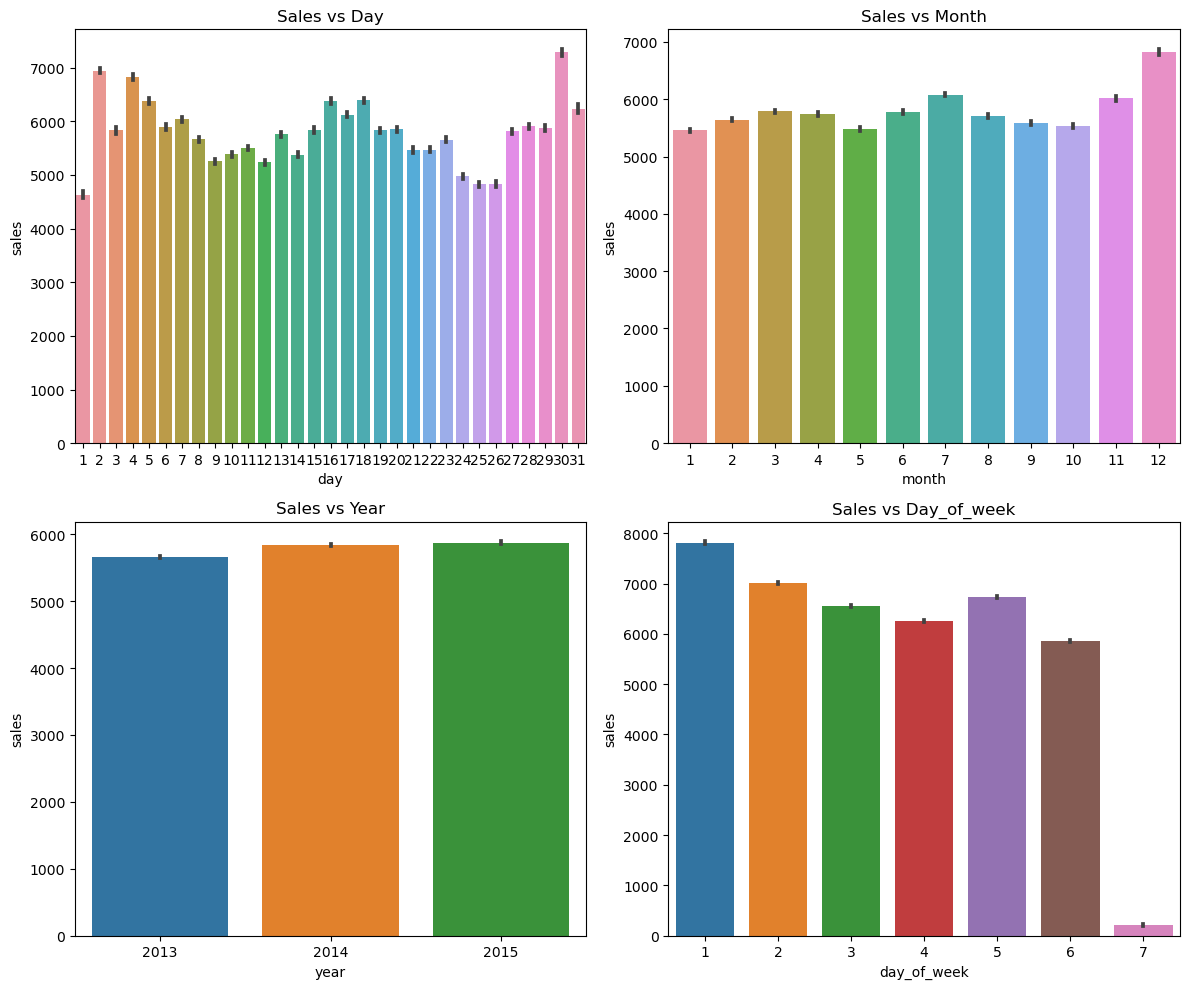

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Flatten the axes array for easier iteration
axes = axes.flatten()
# Define the categorical variables to plot
categorical_vars = ['day', 'month', 'year', 'day_of_week']

# Iterate plot
for i, var in enumerate(categorical_vars):
    sns.barplot(x=var, y='sales', data=df, ax=axes[i])
    axes[i].set_title(f'Sales vs {var.capitalize()}')

plt.tight_layout()
plt.show()

In [38]:

#year and day of the month doesnt influence
# MONTH does influence

In [15]:
# IMBALANCE
for column in ['open','promotion','state_holiday','school_holiday']:
        value_count = df[column].value_counts()
        print(f'valuecount in {column}: {value_count}')


valuecount in open: open
1    532016
0    108824
Name: count, dtype: int64
valuecount in promotion: promotion
0    396220
1    244620
Name: count, dtype: int64
valuecount in state_holiday: state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64
valuecount in school_holiday: school_holiday
0    526468
1    114372
Name: count, dtype: int64


In [20]:
#let's split date into month, day, year
    #Alex
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Display the result
df[['date', 'year', 'month', 'day']] #later on we can remove date

,date,year,month,day
0,2013-04-18,2013,4,18
1,2015-04-11,2015,4,11
2,2013-08-29,2013,8,29
3,2013-05-28,2013,5,28
4,2013-10-10,2013,10,10
...,...,...,...,...
640835,2013-10-26,2013,10,26
640836,2014-04-14,2014,4,14
640837,2014-07-07,2014,7,7
640838,2014-06-12,2014,6,12


In [41]:
print(df.columns[index])

NameError: name 'index' is not defined

In [45]:
#df=df.drop(['date'], axis=1)
# DROP columns with less added value: 'date','year','day','Unnamed: 0'
#df_1 is for model
#df_1=df.drop(['date', 'Unnamed: 0','year','day'], axis=1)
df_1= df_open.drop(['year','day'], axis=1)
df_1.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month
0,366,4,517,1,0,0,0,4422,4
1,394,6,694,1,0,0,0,8297,4
2,807,4,970,1,1,0,0,9729,8
3,802,2,473,1,1,0,0,6513,5
4,726,4,1068,1,1,0,0,10882,10


 to test:
- store ID has an influence on sales (hypothesis testing? pivot table?)
- holidays+promo+nb of customers+weekday : which has an influence? can we make a model out of all?

## Filter and x/y

In [27]:
#our target is sales : shall we filter out when store is open?
#df_open = df[df['open']==1]
#df_open.head

<bound method NDFrame.head of         store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0            366            4                  517     1          0   
1            394            6                  694     1          0   
2            807            4                  970     1          1   
3            802            2                  473     1          1   
4            726            4                 1068     1          1   
...          ...          ...                  ...   ...        ...   
640833        77            6                  701     1          0   
640835       409            6                  483     1          0   
640836        97            1                  987     1          1   
640837       987            1                  925     1          0   
640838      1084            4                  725     1          0   

       state_holiday  school_holiday  sales  year  month  day  
0                  0               0   4422  2013    

In [46]:
y = df_1['sales']
X = df_1.drop(['sales'], axis=1)

In [19]:
#second step:
#y = df_open['sales']
#X = df_open.drop(['sales'], axis=1

In [47]:
df_1.dtypes

store_ID                int64
day_of_week             int64
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
month                   int32
dtype: object

## Numerical and Categorical X

In [48]:
numerical=df_1['nb_customers_on_day']
categorical=df_1.drop(['sales','nb_customers_on_day'], axis=1)
#categorical.head

## Train test

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Data transformation

Split num and cat Train/Test

In [51]:

train_num = X_train['nb_customers_on_day']
train_cat = X_train[categorical.columns]

test_num = X_test['nb_customers_on_day']
test_cat = X_test[categorical.columns]

In [53]:
print(train_num.shape)
print(train_cat.shape)
print(test_num.shape)
print(test_cat.shape)

(425612,)
(425612, 7)
(106404,)
(106404, 7)


In [55]:
X_train_num = train_num.values.reshape(-1, 1) #will reshape the 1D array into a 2D array with one column and 425612 rows, as you wanted
X_test_num = train_num.values.reshape(-1, 1) #will reshape the 1D array into a 2D array with one column and 425612 rows, as you wanted.
X_train_cat=train_cat
X_test_cat=test_cat

In [56]:
#Scale NUM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
#Fit and transform TRAIN
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=['nb_customers_on_day'])
# transform TEST
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=['nb_customers_on_day'])

In [57]:
#encode CAT: 
#we don't encode store_ID
#already binary: promotion, school_holiday
#we onehotencode : month, day_of_week, state_holiday
from sklearn.preprocessing import OneHotEncoder
cat_columns_to_encode = ['month', 'day_of_week', 'state_holiday']
X_train_cat_encoded = pd.get_dummies(X_train_cat[cat_columns_to_encode], columns=cat_columns_to_encode)
X_test_cat_encoded = pd.get_dummies(X_test_cat[cat_columns_to_encode], columns=cat_columns_to_encode)

# Ensure that both datasets have the same columns after encoding
# This is necessary to ensure consistency when applying the model
X_train_cat_encoded, X_test_cat_encoded = X_train_cat_encoded.align(X_test_cat_encoded, axis=1, join='outer', fill_value=0)

# Concatenate the one-hot encoded columns with the remaining categorical columns
X_train_cat_encoded = pd.concat([X_train_cat.drop(columns=cat_columns_to_encode), X_train_cat_encoded], axis=1)
X_test_cat_encoded = pd.concat([X_test_cat.drop(columns=cat_columns_to_encode), X_test_cat_encoded], axis=1)

# Now X_train_cat_encoded and X_test_cat_encoded contain the one-hot encoded features
X_train_cat_encoded
X_test_cat_encoded

,store_ID,open,promotion,school_holiday,month_1,month_2,month_3,month_4,month_5,month_6,...,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
607388,161,1,0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
217385,553,1,0,1,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
64555,898,1,1,0,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
71024,804,1,1,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
226709,816,1,1,1,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [58]:
# Print column names 
print("Column names of X_train_cat_encoded:")
print(X_train_cat_encoded.columns)


print("\nColumn names of X_test_cat_encoded:")
print(X_test_cat_encoded.columns)

Column names of X_train_cat_encoded:
Index(['store_ID', 'open', 'promotion', 'school_holiday', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'state_holiday_0', 'state_holiday_a',
       'state_holiday_b', 'state_holiday_c'],
      dtype='object')

Column names of X_test_cat_encoded:
Index(['store_ID', 'open', 'promotion', 'school_holiday', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'state_holiday_0', 'state_holiday_a',
       'state_holiday_b', 'state_holiday_c'],
      dtype='object')


In [59]:
#  re-concatenate train_num and train_cat as X_train (as well as test_num and test_cat) as X_test
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded.reset_index(drop=True)], axis=1)
X_test.head()

,nb_customers_on_day,store_ID,open,promotion,school_holiday,month_1,month_2,month_3,month_4,month_5,...,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,0.100798,161.0,1.0,0.0,1.0,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,0.180991,553.0,1.0,0.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,0.219046,898.0,1.0,1.0,0.0,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,0.111008,804.0,1.0,1.0,0.0,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,0.053276,816.0,1.0,1.0,1.0,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False


## Model choice

In [60]:
#Let's estimate each model performance
from sklearn.model_selection import cross_val_score

#we want to determine which family of models is likely to give the best result ON THIS data
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()


model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']

scores = {}
for model, model_name in zip(model_pipeline, model_names): #zip creates a tupple of 2 lists
    #Cross Validation is the process of performing several different test-train splits
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

# let's use Linear Regression

{'Decision Tree Regressor': 0.8583737383365477, 'Linear Regression': 0.744515460166627, 'KNN': 0.7380123461979806}


# Fit